
## STOCHASTIC MODELING
MODULE 5 | LESSON 1


---

# **DYNAMIC PROGRAMMING**

|  |  |
|:---|:---|
|**Reading Time** |  1h |
|**Prior Knowledge** |Markov process, Optimization, Monte Carlo  |
|**Keywords** |Dynamic programming, value function


---

*In this notebook, we introduce dynamic programming in a reinforcement learning framework with Python. This lecture represents the first building block in order to understand more complex reinforcement learning methods such as the q-value. Make sure you understand this properly because it is going to lay the foundation for future work.*

## **1. REINFORCEMENT LEARNING: DYNAMIC PROGRAMMING**

### **1.1 Dynamic Programming and the Reinforcement Learning Setup**

In Reinforcement Learning, an agent makes observations and takes actions within an environment, and in return, it receives rewards. Its objective is to learn to act in a way that will maximize its expected long-term rewards. You can think of positive rewards as pleasure and negative rewards as pain. In short, the agent acts in the environment and learns by trial and error to maximize its pleasure and minimize its pain. 

Fortunately, in the financial context, it is easy to come up with a quantification of rewards. For instance, with Reinforcement Learning, we can let the agent observe stock market prices and decide how much to buy or sell of a given stock at every second. Rewards are easy to measure in our setup because they can be expressed in terms of monetary gains and losses, including the returns obtained and any potential transaction costs involved in the trading choices.

In this module, we are going build on the tools of Dynamic Programming. The term Dynamic Programming (DP) refers to a collection of algorithms that can be used to compute optimal policies given perfect knowledge of the environment. Classical DP algorithms are of limited utility in reinforcement learning both because of their assumption of perfect knowledge of the environment and of their great computational expense, but they are still important theoretically. All of the methods that underlie RL can be viewed as attempts to achieve the same objective as a classical DP problem, only with less computation and without assuming a perfect model of the environment.

### **1.2 The Value Function**

From the previous module, notice that we defined a Reinforcement Learning setup as a process where, at each time step $t$, the environment is represented by a *state* $s_t\in\mathcal{S}$, an agent taking an action $a_t\in\mathcal{A}$ that implies (i) a reward $r_t\in\mathcal{R}$ for the agent, and (ii) a transition to state $s_{t+1}\in\mathcal{S}$. Assuming the Markov property, we have that:
*   $\mathbb{P}(s_{t+1}|s_{t},a_{t})=\mathbb{P}(s_{t+1}|s_{t},a_{t},...,s_{0},a_{0})$
*   $\mathbb{P}(r_{t}|s_{t},a_{t})=\mathbb{P}(r_{t}|s_{t},a_{t},...,s_{0},a_{0})$

This RL framework that imposes the Markov property is known as a Markov Decision Process (MDP). The agent must make decisions in a sequential manner, under what objective? The problem boils down to finding a policy $\Pi: \mathcal{S}\rightarrow\mathcal{A}$ that maps states into actions. We must find an action that is best to take now for each current realization of the state. Due to the Markov property, we must only take care of the current state and we can forget about past realizations.

What is the criterion to find a good policy? The key idea of DP, and of RL generally, is the use of value functions to organize and structure the search for good policies. In a dynamic environment, we should not just care about the current reward, so the problem is more complicated than choosing $a_t$ to maximize $r_t$. Indeed, we are going to consider an intertemporal criterion, defined as value:
$$
\begin{align}
v_t(s) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r_{t+1}(s',s,a) + \gamma\ v_{t+1}(s') \big]
\end{align}
$$
where "$'$" denotes the next period's choices and states. That is, given a choice now of action $a$, the value for an agent in state $s$ comes from its reward out of action $a$ and the value in future states, considering that the choice $a$ may also affect the future state $s'$. The parameter $\gamma\in(0,1)$ captures the extent to which current rewards are more relevant relative to more distant ones, i.e., it is a measure of the agent's patience. We can also refer to $\gamma$ as the *discount factor* of the agent.

Although we are going to cover a wide range of problems, let's first consider stationary problems with infinite-horizon. This means that the agent will take actions forever, albeit possibly with some terminal state(s). In a stationary setup, whenever the agent has stepped into state $s$, the expected length of the agent's life is the same as it was the previous time it reached $s$, and so the behavior is the same. With a stationary problem, we can get rid of the subindex $t$ in the value function:
$$
\begin{align}
v(s) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) +  \gamma\ v(s') \big]
\end{align}
$$
Thus, the best policy would lead to the function:
$$
\begin{align}
v^*(s) = \underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) + \gamma\ v^*(s') \big]
\end{align}
$$
$v^*(s)$ is the optimal value function. The optimal value of a state $s$ is the maximum over all actions the agent can take including the current period's reward and the next state's optimal value. The idea is that, in every state, we want to choose the action that maximizes the value of the future.

Let $N$ denote the number of possible states in the Markov chain of the DP problem. Notice that the equation above defines a system of $N$ equations, one for each state, and $N$ unknowns, each $v^*(s)$. Banach's fixed-point theorem guarantees that there exists a single optimal policy $v^*(s)$ for each $s$.

The optimal policy is, then:
$$
\begin{align}
\Pi^*(s) = \arg\underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a) \big[  r(s',a) +  \gamma\ v^{*}(s')\big]
\end{align}
$$
### 1.3 Value Iteration

How do we compute $v^*$? One way is to solve the system of equations using linear algebra. However, the most practical way is to exploit the following value iteration algorithm:

Begin with some flat guess, say $v^{(0)}(s)=0$, for all $s$.
1. Compute $v^{(1)}(s) = \underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a)\big[  r(s',s,a) +  \gamma\ v^{(0)}(s')\big]$.
2. Stop if $v^{(0)}$ and $v^{(1)}$ are close enough. Otherwise, set $v^{(0)}=v^{(1)}$ and return to step 1.

It is guaranteed that we can get close enough to $v^*$ within a finite number of iterations.

## 2. Optimal timing to sell an asset

Consider an investor that owns a financial asset, whose dividends $s_t\geq 0$ fluctuate randomly according to a Markov process that takes values in $\{s_1,...,s_N\}$, with $s_1=0$ being an absorbing state (say, bankruptcy and liquidation), and $s_i<s_{i+1}$ for $i=1,2,...,N$.

Suppose that the dividend Markov process is defined by the following transition matrix:
$$
\begin{align}
& \mathbb{P}(s_i|s_{i-1}) = \mathbb{P}(s_i|s_{i+1}) = 0.5\ \text{for}\ i=2,...,N-1 \\
& \mathbb{P}(s_{1}|s_{1}) = \mathbb{P}(s_{N-1}|s_{N}) = 1
\end{align}
$$
That is, at each date, dividends go up or down one step with equal probability, and the process always bounces back once it has reached the maximum level of dividends. As mentioned above, the state $s_1$ is absorbing.

An investor (the agent) currently holds the asset. At each point in time, the investor must choose to either hold the asset or sell it at a price $\ell$ to other investors, in which case the stream of dividends stops. Therefore, the action space is $\mathcal{A}=\{hold,sell\}$, and the rewards for the investor are $r(s)=s$ when the investor holds, $r(s)=\ell$ when the asset is sold, and $r(s)=0$ thereafter. Therefore, this means that $\mathbb{P}(s_i|s_j,sell)=0$ for all $j$ and $i\neq 1$, and $\mathbb{P}(s_1|s_j,sell)=1$ for all $j$. In contrast, the investor's actions leave the underlying Markov process unchanged unless they decide to sell the asset, formally $\mathbb{P}(s'|s,hold)=\mathbb{P}(s'|s)$.

Let's find the optimal solution to this problem through value iteration.

First, load the libraries that we will need in this module.

In [1]:
# Import libraries to use in this notebook
import matplotlib.pyplot as plt
import numpy as np

We set up the parameters of the model. We set the number of actions to 2 (selling or not), $N=10$, and assume that dividends take values between 0 and 10 in increments of one. We also build the transition matrix as we assumed above. Notice that this process has a unique stationary distribution that puts all the probability on state $s_1$. In statistical terms, the process almost surely converges to the liquidation state.<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [2]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 1. Set up the dividend Markov process
N = 11  # Number of dividend states
A = 2  # Number of actions
S_MIN = 0.0  # Minimum dividend
S_MAX = 10.0  # Maximum dividend
S_GRID = np.linspace(S_MIN, S_MAX, N)  # Array of possible dividend realizations

# Build the transition matrix
P = np.zeros((N, N))
P[0, 0] = 1.0  # State 0 is absorbing
P[N - 1, N - 2] = 1  # State N bounces back
# In other states dividends decrease or increase in one step with equal pr.
for ss in range(1, N - 1):
    P[ss, ss - 1] = 0.5
    P[ss, ss + 1] = 0.5

In [3]:
S_GRID

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

We now initialize the parameters of the DP problem. We set the patience parameter $\gamma$ to 0.75. We assume that the agent can sell the asset at a fixed price of 15. We set two convergence criteria that determine when the iteration should stop. Specifically, our convergence criterion is:
$$
\begin{align}
\underset{s}{\max}|v^{(1)}(s)-v^{(0)}(s)| < \epsilon
\end{align} 
$$
where $\epsilon=0.0001$. Besides, we set the maximum number of iterations to 200, which is useful to keep the iteration from running forever in case we make mistakes.

We also initialize the main outputs of interest to zero, the value and policy functions for the realization of each state.

In [4]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 2. Set up the parameters of the DP problem

GAMMA = 0.75

SELLING_PRICE = 15.0

ITETOL = 1e-4
ITEMAX = 200

value = np.zeros((N))
policy = np.zeros((N))

Once we have set up the problem, we can approximate the optimal value function. At each iteration, we take as given the optimal value in the previous iteration. Given that value, we compute an updated value function across each state. If the investor sells, they get 15; otherwise, they receive some expected dividend $s_t$ plus the discounted continuation value. Then, the updated value function is the maximum value across each action, and the optimal policy is the corresponding element of the maximum operator. We stop the iterations when the maximum number of iterations is exceeded or the convergence criterion is met.

In [5]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 3. Value function iteration

for ite in range(ITEMAX):
    value_old = value.copy()
    value = np.zeros((N))
    for ss in range(N):
        val = np.zeros(A)
        val[0] = np.dot(P[ss, :], S_GRID + GAMMA * value_old)
        val[1] = SELLING_PRICE
        value[ss] = np.max(val)
        policy[ss] = np.argmax(val)
    if np.max(np.absolute(np.subtract(value_old, value))) < ITETOL:
        break

print(ite + 1)

37


The process converges after 37 iterations. Let's now plot the optimal value and policy functions across each state (dividend) realization of the asset.

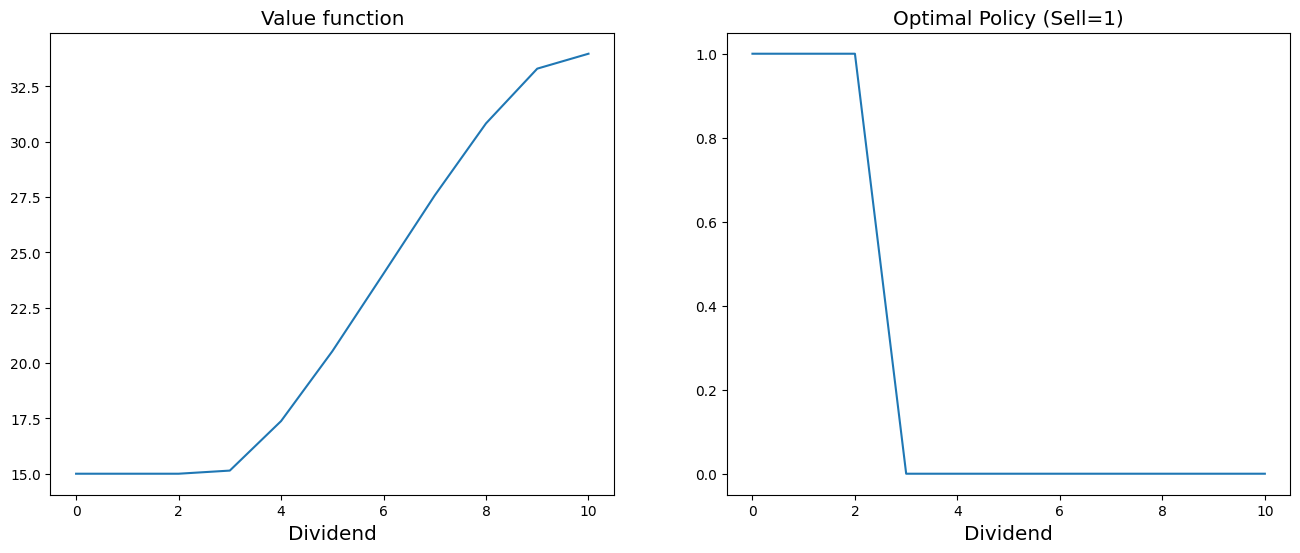

In [6]:
# SOLVING THE INVESTOR'S PROBLEM
# Plot the value function and the optimal policy
plt.subplot(1, 2, 1)
plt.plot(S_GRID, value)
plt.title("Value function", fontsize="x-large")
plt.xlabel("Dividend", fontsize="x-large")
plt.subplot(1, 2, 2)
plt.plot(S_GRID, policy)
plt.title("Optimal Policy (Sell=1)", fontsize="x-large")
plt.xlabel("Dividend", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()

The problem above boils down to the investor finding the optimal timing to sell the asset. If the investor decides not to sell, then they face the risk of liquidation and receiving no dividends after that. The investor sells the asset when dividend realizations are relatively low, in this case below 2. At this level, the probability of reaching the liquidation state is too high, which makes it worthy to sell the asset at the predetermined price.

The parameter $\gamma$ modulates how much the investor is willing to wait for a further period before selling the asset. Low values of $\gamma$ imply a low value of the future dividend realizations, in which case the agent is more likely to sell the asset. In contrast, high values of $\gamma$ imply that future dividends are equally valuable to the future dividends, in which case the investor is more likely to hold the asset one more period.

Notice that in this setup the investor is optimally choosing when to exercise a put option, depending on the information about current and future expected dividends. We can easily come up with the values for the put option for each state $s$ if we compare the value function above with the value function that would arise in the absence of the option to sell (that is, a put option with a strike of 0). The investor should purchase the option whenever its value exceeds the value of not purchasing the option. Make sure that you can navigate through the code above to understand how to obtain the option values for different strikes and states.

## **3. Conclusion**

In this lesson, we have worked through concepts of dynamic programming and its application to a simple financial case study. In the next lesson we will extend these concepts to the "q-function" framework.

See you there!

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
